# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

In [12]:
using PyPlot

1.Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

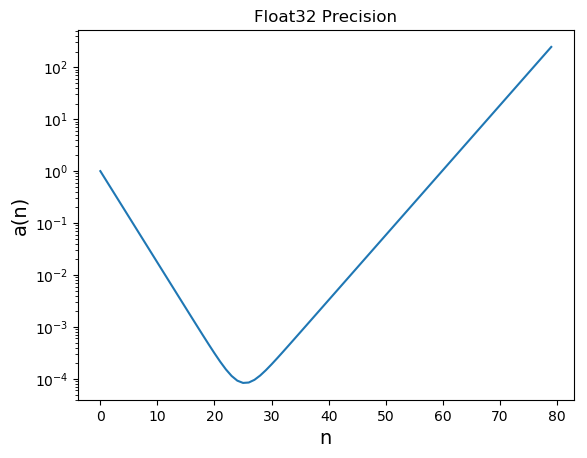

0-element Array{Any,1}

In [2]:
#Problem1

a=Array{Float32}(80)
a[1]=1
a[2]=2/3


for n = 2:79
    a[n+1] = 2*a[n]-(8/9)*a[n-1]
end
a;

plot(a)
plt[:xlabel]("n", fontsize=14)
plt[:ylabel]("a(n)", fontsize=14)
plt[:title]("Float32 Precision")
semilogy()

2.Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

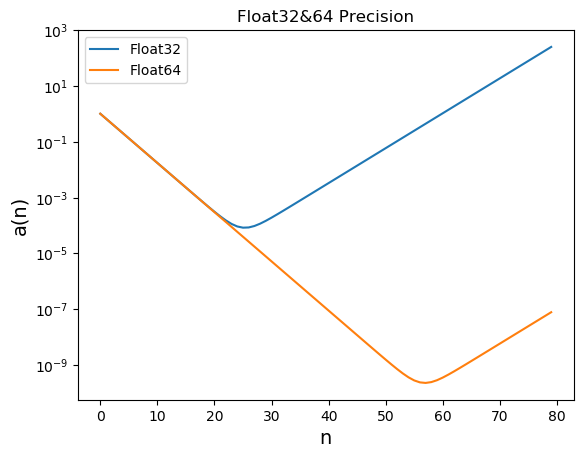

0-element Array{Any,1}

In [3]:
#Problem2

aa=Array{Float64}(80)
aa[1]=1
aa[2]=2/3

for n = 2:79
    aa[n+1] = 2*aa[n]-(8/9)*aa[n-1]
end
aa;


plot(a, label="Float32")
plot(aa, label="Float64")
plt[:xlabel]("n", fontsize=14)
plt[:ylabel]("a(n)", fontsize=14)
plt[:title]("Float32&64 Precision")
plt[:legend]()
semilogy()

3.Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

**Answer**

Use the ansatz $a_n = \lambda^n$ 
$$ \lambda^{n+1} = 2\lambda^n - \frac{8}{9} \lambda^{n-1} $$
Sort this equation out, then 
$$ \lambda^{2} = 2\lambda - \frac{8}{9} $$
We get values of $\lambda$ by solving quadratic equation
$$ \lambda_{1,2} = \frac{2 \pm \sqrt{4-\frac{32}{9}}}{2} = 1 \pm \frac{1}{3} $$
Thus the general solution is
$$ a_{n+1} = c_1(\frac{4}{3})^{n} + c_2(\frac{2}{3})^{n} $$

4.Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

**Answer**

We get the value of $a_1$ and $a_2$ by solving the system of equation
$$ a_1 = c_1+c_2 $$
$$ a_2 = c_1\frac{4}{3}+\frac{2}{3}c_2$$
Since $c_1 = 0$, $c_2=1$, the solution satisfying the initial conditions is,
$$ a_{n+1} = (\frac{2}{3})^{n} $$

5.Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

**Answer**

Solve the system of equation to find $c_1$ and $c_2$ that satisfies the perturbed initial conditions.

$$ 1 = c_1+c_2 $$
$$ \frac{2}{3}+\epsilon = c_1\frac{4}{3}+\frac{2}{3}c_2$$

Then we get $c_1 = \frac{3}{2}\epsilon$, $c_2 = 1-\frac{3}{2}\epsilon$. 
Here, we can find that now $c_1$ affects to whole term because it is not 0 and multiply to $(\frac{4}{3})^n$.
Therefore, as n gets bigger, it will dominate the whole term.

This is the reason why the plot of "Float32 Precision" shows rebounding line that decreases at the beginning and starts soaring at some point.

6.Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [4]:
#Problem6

aaa=Array{BigFloat}(80)
aaa[1]=BigFloat(1)
aaa[2]=BigFloat(2)/BigFloat(3)

for n = 2:79
    aaa[n+1] = BigFloat(2)*aaa[n]-BigFloat(8)/BigFloat(9)*aaa[n-1]
end

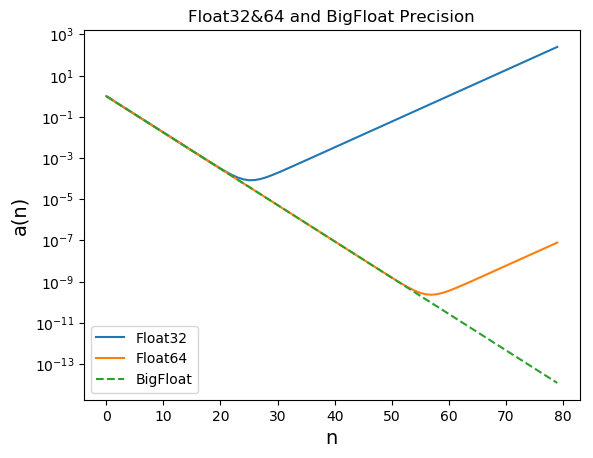

0-element Array{Any,1}

In [5]:
#Problem 1,2,6

plt[:title]("Float32&64 and BigFloat Precision")
plot(a, label="Float32")
plot(aa, label="Float64")
plot(aaa, label="BigFloat", linestyle="--")
plt[:xlabel]("n", fontsize=14)
plt[:ylabel]("a(n)", fontsize=14)
legend()
semilogy()

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [4]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1.Verify that the function mergepresorted(A, B) works as described.

In [5]:
AA=sort(rand(1:100,5))
@show AA

BB=sort(rand(1:100,3))
@show BB

mergepresorted(AA,BB)

# =>It works as described

AA = [4, 44, 44, 48, 96]
BB = [43, 68, 69]


8-element Array{Int64,1}:
  4
 43
 44
 44
 48
 68
 69
 96

2.Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.

In [6]:
function merge(A::Array{Int64,1})
    n=length(A)
    if n==Int64(1)
        return A
    else
        m=Int64(n/2)
        return mergepresorted(merge(A[1:m]),merge(A[m+1:n]))
    end
end

merge (generic function with 1 method)

In [7]:
L=rand(1:100,8)
merge(L)

# =>it works

8-element Array{Int64,1}:
 13
 18
 18
 22
 31
 58
 73
 93

3.Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$. 

**Answer**

During the procedure of the algorithm, it copies the given array, so $n$ cost occurs.
Then the whole array is divided into two parts. So the length of each array is $\frac{n}{2}$. Here, the total number of arithmetic operations required to solve a problem of size $k$ is $F(k)$.

In this case the problem size is $\frac{n}{2}$.

There are two arrays which has the same length, n/2 respectively.

Thus, $2F(\frac{n}{2})$

As a result, total $F(n)$ is 
$$F(n)= 2F(\frac{n}{2})+n$$

4.Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.

**Answer**
$$F(n) = 2\, F(\frac{n}{2}) + n $$

$$\rightarrow \ F(2^p) = 2\, F(\frac{2^p}{2}) + 2^p $$
$$\rightarrow \ F(2^p) = 2\, F(2^{p-1}) + n $$

$$\rightarrow \ b_p = 2\, b_{p-1} + 2^p $$

Initial condition: $b_0 = F(1) = 1$

5.Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).

**Answer**

Find solution to 
$$ b_p = 2\, b_{p-1} $$
$$ \rightarrow \lambda^p = 2 \lambda^{p-1} $$
$$ \rightarrow \lambda = 2 $$

6.Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.

Using ansatz: $b_p = Ap2^p$, 
Then we get 
$$ Ap2^p = 2A(p-1)2^{p-1} + 2^p $$

Sort the equation out and get
$$  2^p( Ap - A(p-1) -1 ) = 0 $$

Since $p$ that satisfies the condition $ 2^p = 0 $, $A=1$ is the only solution.

Therefore, 
$$ b_p = c2^p(1+p) $$

From the initial condition, we find $c=1$, thus
$$ b_p = 2^p(1+p) $$

Since $n=2^p$, we can represent $p=\frac{\log(n)}{2}$
and then finally, 

$$ F(n) = n(1+\frac{\log(n)}{2}) $$

7.Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.

$$ F(n) = n(1+\frac{\log(n)}{2}) \xrightarrow{n \text{ large}} n\log(n)  $$

8.Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [10]:
N=15
times = []

for i in 1:N
    A = rand(1:2^i, 2^i) 
    runtime = @timed merge(A)
    push!(times, runtime[2])
end

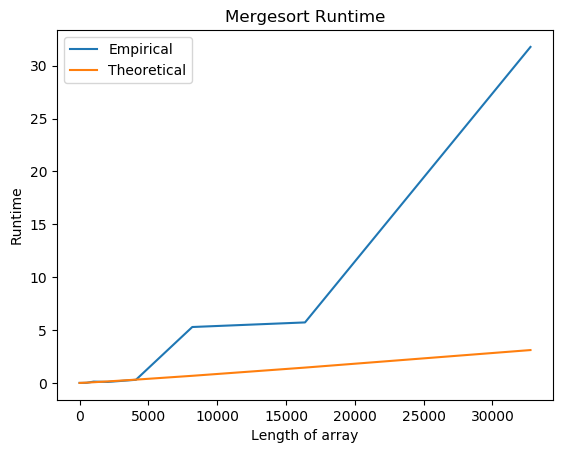

PyObject <matplotlib.legend.Legend object at 0x00000000D5F9C940>

In [14]:
x = 2.^(1:N)
y = x.*(log.(x))*times[1]
plt[:xlabel]("Length of array")
plt[:ylabel]("Runtime")
plt[:title]("Mergesort Runtime")
plt[:plot](x, times, label="Empirical")
plt[:plot](x, y, label="Theoretical")
plt[:legend]()